In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from impyute.imputation.cs import fast_knn
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix
import warnings
warnings.simplefilter('ignore')

# DATA PREPARATION

In [2]:
df = pd.read_excel('NAFLD.xlsx')
df_X = df.iloc[:, 1:-11]
sig_fib_y = pd.DataFrame(df.iloc[:, -5])
adv_fib_y = pd.DataFrame(df.iloc[:, -4])
sig_fib_y.rename(columns={'Significant Fibrosis (No=0, Yes=1) (If Fibrosis 2 and above, there is Significant Fibrosis)': 'Significant Fibrosis'}, inplace=True)
adv_fib_y.rename(columns={'Advanced Fibrosis (No=0, Yes=1) (If Fibrosis is 3 and above, there is Advanced Fibrosis)': 'Advanced Fibrosis'}, inplace=True)

In [3]:
nan_columns = df_X.columns[df_X.isna().any()].tolist()
X_columns_1 = df_X.isna().sum().sort_values(ascending=False)[-15:].index   # features with no missing values
X_columns_2 = df_X.isna().sum().sort_values(ascending=False)[15:].index    # features <= 25% missing values threshold
X_baseline_1 = df_X[X_columns_1]   # Data Frame of features with no missing values
X_baseline_2 = df_X[X_columns_2]   # Data Frame of features with <= 25% missing values threshold

In [4]:
X_baseline_1.head(5)   # 605 x 15

,Diastolic Blood Pressure,"Gender (Female=1, Male=2)",Height,Weight,Body Mass Index,Systolic Blood Pressure,"Diyabetes Mellitus (No=0, Yes=1)",Albumin,"Hypertension (No=0, Yes=1)","Hyperlipidemia (No=0, Yes=1)","Metabolic syndrome (No=0, Yes=1)",AST,ALT,Total Cholesterol,Age
0,77,1,150,80,35.56,135,0,5.0,1,1,0,27.0,49,170,60
1,72,1,154,73,30.78,120,0,4.4,0,0,0,17.0,18,170,55
2,80,2,170,101,34.95,120,1,5.1,1,1,1,51.0,74,190,53
3,83,2,175,95,31.02,124,1,4.9,0,1,1,31.0,72,199,33
4,79,2,162,68,25.91,124,0,5.3,0,0,0,32.0,51,211,23


In [5]:
X_baseline_2.head(5)   # 605 x 35

,Total Protein,LDH,Hemoglobin - A1C,Waist Circumference,"Smoking Status (Never Smoked=1, Left Smoking=2, Smoking=3)",Ferritin,Mean Platelet Volume,Hip Circumference,Glucose,LDL,...,Systolic Blood Pressure,"Diyabetes Mellitus (No=0, Yes=1)",Albumin,"Hypertension (No=0, Yes=1)","Hyperlipidemia (No=0, Yes=1)","Metabolic syndrome (No=0, Yes=1)",AST,ALT,Total Cholesterol,Age
0,7.7,281.0,NaN,119.0,2.0,524.0,9.2,104.0,119.0,95.0,...,135,0,5.0,1,1,0,27.0,49,170,60
1,7.2,219.0,NaN,101.0,1.0,41.3,8.1,98.0,NaN,97.0,...,120,0,4.4,0,0,0,17.0,18,170,55
2,8.4,263.0,4.70,116.0,2.0,294.0,9.3,112.0,93.0,103.0,...,120,1,5.1,1,1,1,51.0,74,190,53
3,7.6,166.0,4.70,114.0,2.0,46.0,7.1,114.0,90.0,102.0,...,124,1,4.9,0,1,1,31.0,72,199,33
4,7.9,376.0,4.82,101.0,2.0,158.0,7.4,97.0,89.0,144.0,...,124,0,5.3,0,0,0,32.0,51,211,23


In [6]:
sig_fib_y.head()   # 605 x 1

,Significant Fibrosis
0,0
1,0
2,1
3,0
4,0


In [7]:
adv_fib_y.head()   # 605 x 1

,Advanced Fibrosis
0,0
1,0
2,1
3,0
4,0


## Imputation using fast_knn(k=30)

In [8]:
nan_columns = df_X.columns[df_X.isna().any()]   # features list with NaN values
X_baseline_2 = fast_knn(X_baseline_2, k=30)
X_baseline_2.columns=X_columns_2
nan_columns

Index(['Waist Circumference', 'Hip Circumference',
       'Smoking Status (Never Smoked=1, Left Smoking=2, Smoking=3)', 'ALP',
       'GGT', 'LDH', 'Total Bilirubin', 'Direct Bilirubin', 'Total Protein',
       'Triglycerides', 'HDL', 'LDL', 'Microalbumin Spot Urine',
       'Microalbumin/Creatinine Ratio', 'TSH', 'CK', 'Leukocyte', 'Hemoglobin',
       'Trombosit', 'Mean Corpuscular Volume', 'Mean Platelet Volume', 'PT',
       'INR', 'Vitamin D', 'Ferritin', 'Ceruloplasmin', 'C Peptide', 'Glucose',
       'Insulin', 'HOMA',
       'Insulin resistance according to HOMA (insulin resistance = 1, no insulin resistance = 2)',
       'Uric Acid', 'BUN', 'Creatinine', 'Hemoglobin - A1C'],
      dtype='object')

In [9]:
X_baseline_2.head()   # Data Frame of features <= 25% missing value threshold after imputation

,Total Protein,LDH,Hemoglobin - A1C,Waist Circumference,"Smoking Status (Never Smoked=1, Left Smoking=2, Smoking=3)",Ferritin,Mean Platelet Volume,Hip Circumference,Glucose,LDL,...,Systolic Blood Pressure,"Diyabetes Mellitus (No=0, Yes=1)",Albumin,"Hypertension (No=0, Yes=1)","Hyperlipidemia (No=0, Yes=1)","Metabolic syndrome (No=0, Yes=1)",AST,ALT,Total Cholesterol,Age
0,7.7,281.0,5.877303,119.0,2.0,524.0,9.2,104.0,119.000000,95.0,...,135.0,0.0,5.0,1.0,1.0,0.0,27.0,49.0,170.0,60.0
1,7.2,219.0,6.107008,101.0,1.0,41.3,8.1,98.0,115.021475,97.0,...,120.0,0.0,4.4,0.0,0.0,0.0,17.0,18.0,170.0,55.0
2,8.4,263.0,4.700000,116.0,2.0,294.0,9.3,112.0,93.000000,103.0,...,120.0,1.0,5.1,1.0,1.0,1.0,51.0,74.0,190.0,53.0
3,7.6,166.0,4.700000,114.0,2.0,46.0,7.1,114.0,90.000000,102.0,...,124.0,1.0,4.9,0.0,1.0,1.0,31.0,72.0,199.0,33.0
4,7.9,376.0,4.820000,101.0,2.0,158.0,7.4,97.0,89.000000,144.0,...,124.0,0.0,5.3,0.0,0.0,0.0,32.0,51.0,211.0,23.0


## Normalizing features using StandardScaler

In [10]:
sc = StandardScaler()
std_baseline_1 = sc.fit_transform(X_baseline_1)
std_baseline_2 = sc.fit_transform(X_baseline_2)
X_baseline_1 = pd.DataFrame(std_baseline_1, dtype=float, columns=X_columns_1)
X_baseline_2 = pd.DataFrame(std_baseline_2, dtype=float, columns=X_columns_2)

In [11]:
X_baseline_1.head()   # Normalized Data Frame of features with no missing values

,Diastolic Blood Pressure,"Gender (Female=1, Male=2)",Height,Weight,Body Mass Index,Systolic Blood Pressure,"Diyabetes Mellitus (No=0, Yes=1)",Albumin,"Hypertension (No=0, Yes=1)","Hyperlipidemia (No=0, Yes=1)","Metabolic syndrome (No=0, Yes=1)",AST,ALT,Total Cholesterol,Age
0,-0.545937,-1.063147,-1.492133,-0.445686,0.723409,0.504769,-0.769484,0.871239,1.351704,0.850674,-1.356604,-0.718771,-0.557433,-0.821066,1.287682
1,-1.049277,-1.063147,-1.088584,-0.932904,-0.213363,-0.475497,-0.769484,-0.714738,-0.739807,-1.175538,-1.356604,-1.049641,-1.185265,-0.821066,0.817640
2,-0.243933,0.940604,0.525615,1.015967,0.603863,-0.475497,1.299573,1.135568,1.351704,0.850674,0.737135,0.075318,-0.051117,-0.407457,0.629623
3,0.058071,0.940604,1.030052,0.598352,-0.166328,-0.214092,1.299573,0.606909,-0.739807,0.850674,0.737135,-0.586422,-0.091622,-0.221332,-1.250545
4,-0.344601,0.940604,-0.281484,-1.280917,-1.167772,-0.214092,-0.769484,1.664227,-0.739807,-1.175538,-1.356604,-0.553335,-0.516928,0.026833,-2.190629


In [12]:
X_baseline_2.head()   # Normalized Data Frame of features <= 25% missing value threshold

,Total Protein,LDH,Hemoglobin - A1C,Waist Circumference,"Smoking Status (Never Smoked=1, Left Smoking=2, Smoking=3)",Ferritin,Mean Platelet Volume,Hip Circumference,Glucose,LDL,...,Systolic Blood Pressure,"Diyabetes Mellitus (No=0, Yes=1)",Albumin,"Hypertension (No=0, Yes=1)","Hyperlipidemia (No=0, Yes=1)","Metabolic syndrome (No=0, Yes=1)",AST,ALT,Total Cholesterol,Age
0,-0.181906,0.362000,-0.139524,0.923875,0.384817,3.302281,0.321794,-0.030008,0.331022,-0.913031,...,0.504769,-0.769484,0.871239,1.351704,0.850674,-1.356604,-0.718771,-0.557433,-0.821066,1.287682
1,-1.349523,-0.320122,0.096143,-0.818197,-0.975642,-0.729175,-0.540634,-0.611481,0.201597,-0.866147,...,-0.475497,-0.769484,-0.714738,-0.739807,-1.175538,-1.356604,-1.049641,-1.185265,-0.821066,0.817640
2,1.452758,0.163964,-1.347387,0.633530,0.384817,1.381347,0.400196,0.745289,-0.514783,-0.725497,...,-0.475497,1.299573,1.135568,1.351704,0.850674,0.737135,0.075318,-0.051117,-0.407457,0.629623
3,-0.415429,-0.903227,-1.347387,0.439966,0.384817,-0.689922,-1.324659,0.939114,-0.612376,-0.748939,...,-0.214092,1.299573,0.606909,-0.739807,0.850674,0.737135,-0.586422,-0.091622,-0.221332,-1.250545
4,0.285141,1.407187,-1.224272,-0.818197,0.384817,0.245490,-1.089451,-0.708393,-0.644907,0.235611,...,-0.214092,-0.769484,1.664227,-0.739807,-1.175538,-1.356604,-0.553335,-0.516928,0.026833,-2.190629


# DATA EXPLORATION

(4, 4)

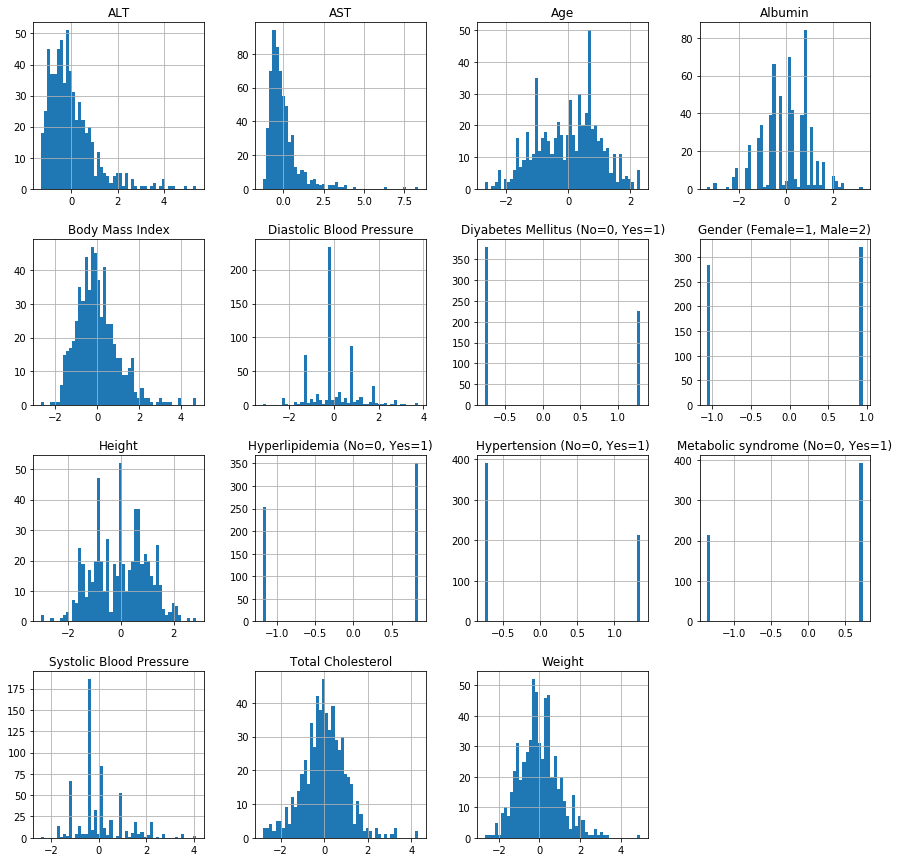

In [13]:
X_baseline_1.hist(figsize=(15, 15), bins=50).shape   # visualizing the distribution of features in dataset (no missing values)

(6, 6)

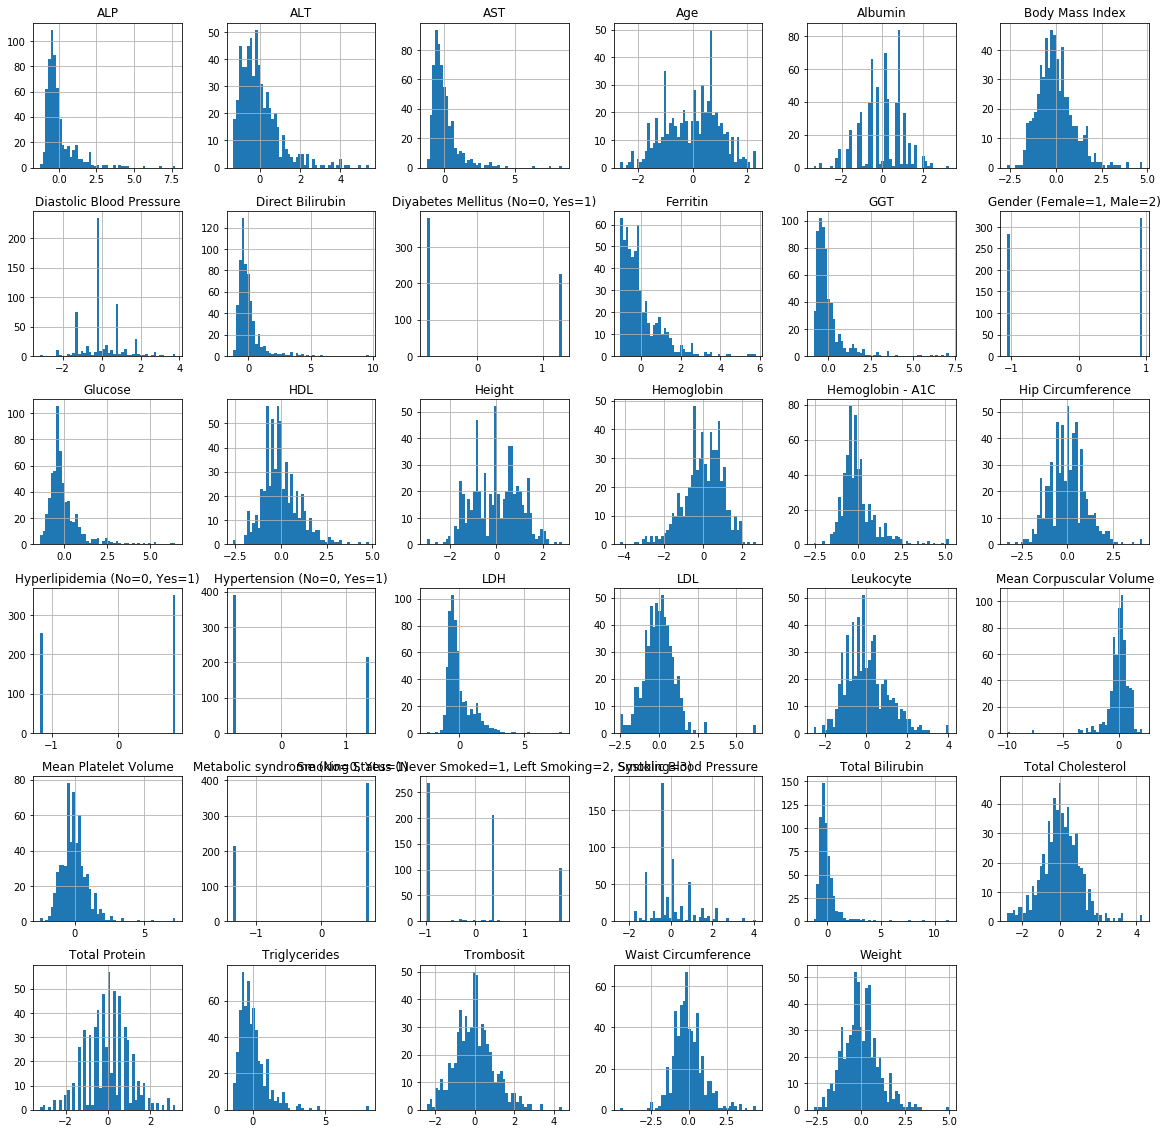

In [14]:
X_baseline_2.hist(figsize=(20, 20), bins=50).shape  # visualizing the distribution of features in dataset (25% missing values threshold)

In [15]:
temp = X_baseline_1.join(adv_fib_y)
correlation = temp.corr()[adv_fib_y.columns].abs()
baseline_1_adv = correlation.sort_values(by=[adv_fib_y.columns[0]], ascending=False)[1:6]   # top 5 pos_corr (features with no missing values and adv_fib)
baseline_1_adv

,Advanced Fibrosis
"Diyabetes Mellitus (No=0, Yes=1)",0.302165
Age,0.229799
Body Mass Index,0.166048
"Hypertension (No=0, Yes=1)",0.160676
Height,0.125120


In [16]:
temp = X_baseline_1.join(sig_fib_y)
correlation = temp.corr()[sig_fib_y.columns].abs()
baseline_1_sig = correlation.sort_values(by=[sig_fib_y.columns[0]], ascending=False)[1:6]   # top 5 pos_corr (features with no missing values and sig_fib)
baseline_1_sig

,Significant Fibrosis
"Diyabetes Mellitus (No=0, Yes=1)",0.295710
Age,0.236602
Body Mass Index,0.151655
"Hypertension (No=0, Yes=1)",0.147724
AST,0.109171


In [17]:
temp = X_baseline_2.join(adv_fib_y)
correlation = temp.corr()[adv_fib_y.columns].abs()
baseline_2_adv = correlation.sort_values(by=[adv_fib_y.columns[0]], ascending=False)[1:6]   # top 5 pos_corr (features <= 25% missing value threshold and adv_fib)
baseline_2_adv

,Advanced Fibrosis
"Diyabetes Mellitus (No=0, Yes=1)",0.302165
Hemoglobin - A1C,0.260040
Age,0.229799
Trombosit,0.220239
Glucose,0.206417


In [18]:
temp = X_baseline_2.join(sig_fib_y)
correlation = temp.corr()[sig_fib_y.columns].abs()
baseline_2_sig = correlation.sort_values(by=[sig_fib_y.columns[0]], ascending=False)[1:6]   # top 5 pos_corr (features <= 25% missing values and sig_fib)
baseline_2_sig

,Significant Fibrosis
"Diyabetes Mellitus (No=0, Yes=1)",0.295710
Age,0.236602
Hemoglobin - A1C,0.235719
Glucose,0.199778
Trombosit,0.175854


(5, 5)

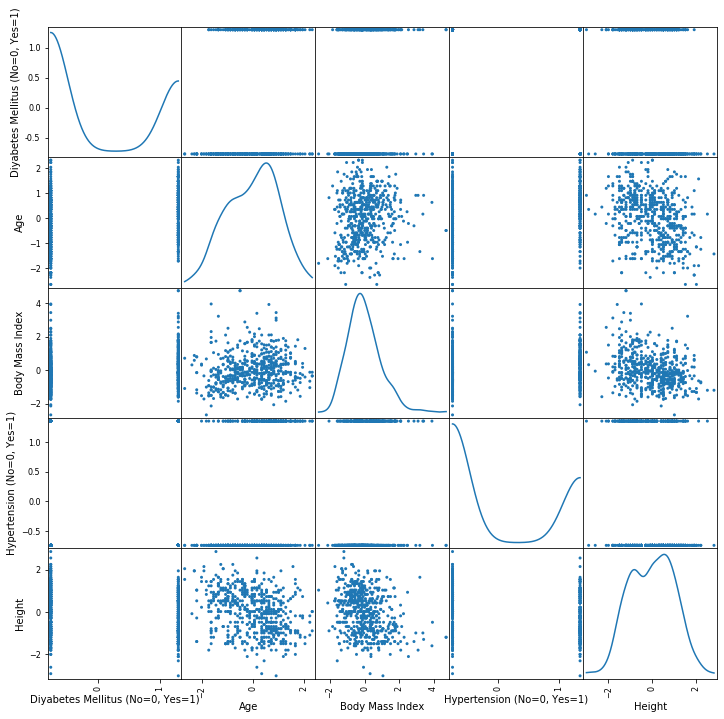

In [19]:
baseline_1_adv_corr = X_baseline_1[baseline_1_adv.index]   # scatter plot pos_corr (features with no missing value and adv_fib) against each other
scatter_matrix(baseline_1_adv_corr, alpha=1.0, diagonal='kde', figsize=(12, 12)).shape

(5, 5)

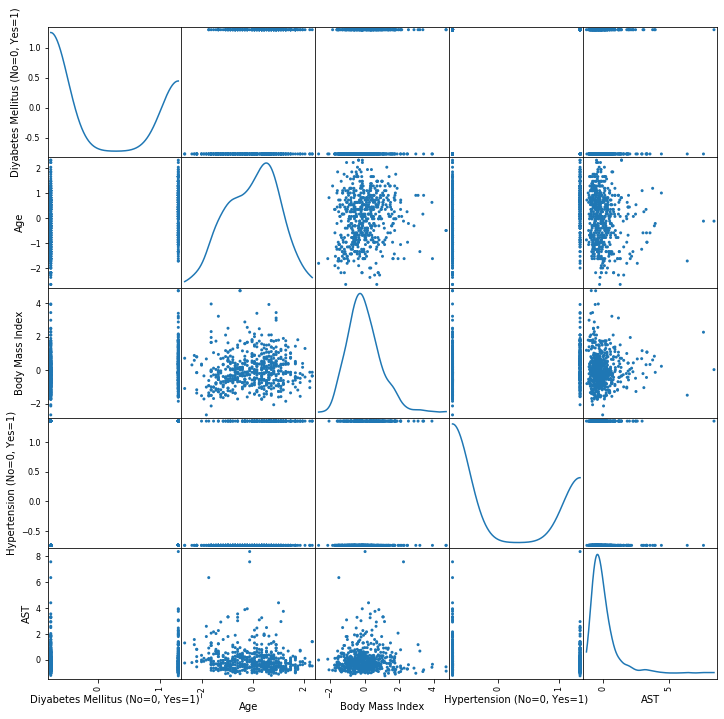

In [20]:
baseline_1_sig_corr = X_baseline_1[baseline_1_sig.index]   # scatter plot pos_corr (features with no missing value and sig_fib) against each other
scatter_matrix(baseline_1_sig_corr, alpha=1.0, diagonal='kde', figsize=(12, 12)).shape

(5, 5)

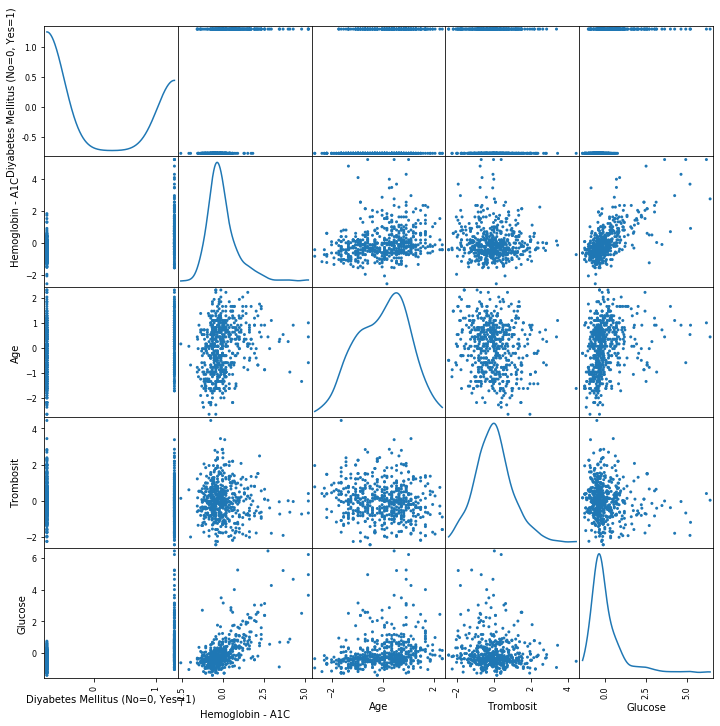

In [21]:
baseline_2_adv_corr = X_baseline_2[baseline_2_adv.index]   # scatter plot pos_corr (features <= 25% missing value and adv_fib) against each other
scatter_matrix(baseline_2_adv_corr, alpha=1.0, diagonal='kde', figsize=(12, 12)).shape

(5, 5)

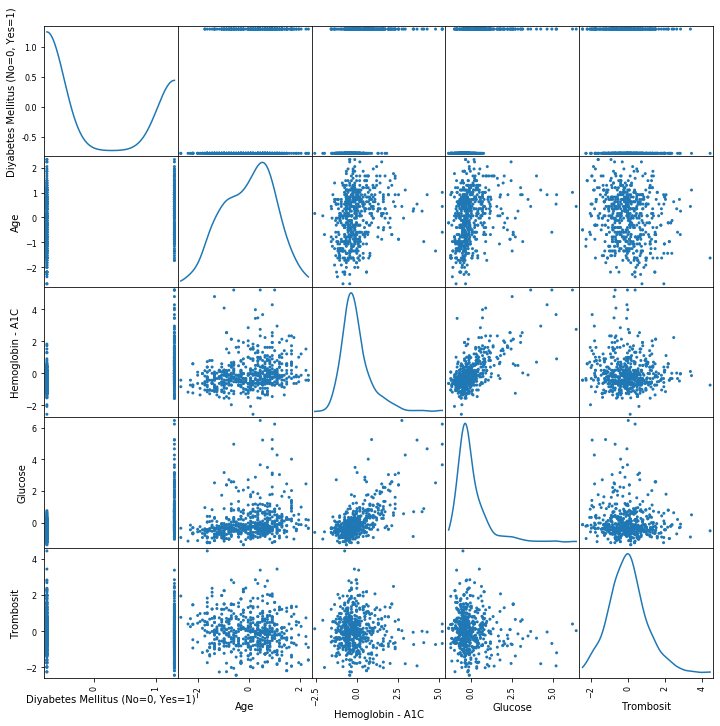

In [22]:
baseline_2_sig_corr = X_baseline_2[baseline_2_sig.index]   # scatter plot pos_corr (features <= 25% missing value and sig_fib) against each other
scatter_matrix(baseline_2_sig_corr, alpha=1.0, diagonal='kde', figsize=(12, 12)).shape

# Learning Models

In [23]:
def plot_confusion_matrix(clf, X_train, y_train, X_test, y_test, title):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sn.heatmap(cm, annot=True)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()    

In [24]:
def get_metrics(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_prob = clf.predict_proba(X_test)
    y_pred = clf.predict(X_test)
    auc_score = roc_auc_score(y_test, y_prob[:, 1])
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    sensitivity = tp / (tp + fn)    # also called recall and true positive rate
    specificity = tn / (tn + fp)    # also called true negative rate
    ppv = round(tp / (tp + fp), 3)    # also called precision
    npv = round(tn / (tn + fn), 3)
    plr = round(sensitivity / (1 - specificity), 3)
    nlr = round((1 - sensitivity) / specificity, 3)
    return round(sensitivity * 100, 0), round(specificity * 100, 0), fn, fp, ppv, npv, plr, nlr, round(auc_score, 3)

In [25]:
def get_roc_auc_score(clf, X_train, y_train, X_test, y_test, label):
    clf.fit(X_train, y_train)
    probs = clf.predict_proba(X_test)
    auc = roc_auc_score(y_test, probs[:, 1])
    fpr, tpr, thresholds = roc_curve(y_test, probs[:, 1])
    return auc, fpr, tpr, thresholds, label

In [26]:
def plot_roc_curve(X_train, y_train, X_test, y_test, title):
    scores = [get_roc_auc_score(clf, X_train, y_train, X_test, y_test, label) for clf, label in 
              [(LogisticRegression(), 'LR'), (SVC(probability=True), 'SVM'), (RandomForestClassifier(), 'RF'), (BaggingClassifier(), 'Bag.')]]
    plt.plot(scores[0][1], scores[0][2], marker='.', color='black', label='{}: {}'.format(scores[0][4], round(scores[0][0], 2)))
    plt.plot(scores[1][1], scores[1][2], marker='.', color='red', label='{}: {}'.format(scores[1][4], round(scores[1][0], 2)))
    plt.plot(scores[2][1], scores[2][2], marker='.', color='blue', label='{}: {}'.format(scores[2][4], round(scores[2][0], 2)))
    plt.plot(scores[3][1], scores[3][2], marker='.', color='green', label='{}: {}'.format(scores[3][4], round(scores[3][0], 2)))
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('1 - Specificity')
    plt.ylabel('1 - Sensitivity')
    plt.title(title)
    plt.legend()
    plt.show()

### Classification Models performance on Advanced Fibrosis with 0 missing values

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
import seaborn as sn
X_train, X_test, y_train, y_test = train_test_split(X_baseline_1, adv_fib_y, random_state=0, test_size=0.2, stratify=adv_fib_y)

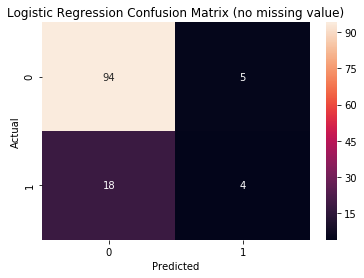

In [28]:
plot_confusion_matrix(LogisticRegression(), X_train, y_train, X_test, y_test, 'Logistic Regression Confusion Matrix (no missing value)')

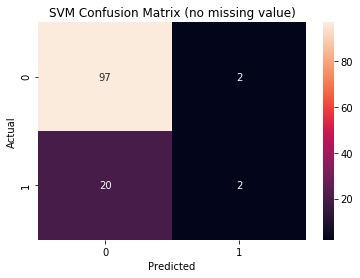

In [29]:
plot_confusion_matrix(SVC(), X_train, y_train, X_test, y_test, 'SVM Confusion Matrix (no missing value)')

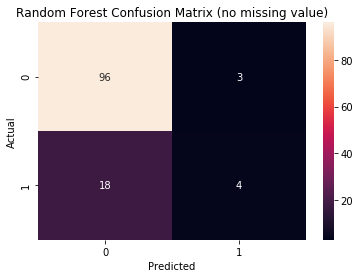

In [30]:
plot_confusion_matrix(RandomForestClassifier(), X_train, y_train, X_test, y_test, 'Random Forest Confusion Matrix (no missing value)')

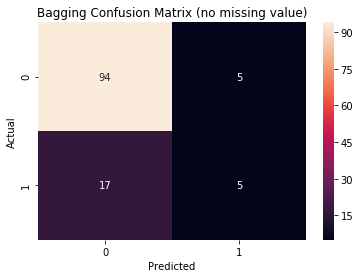

In [31]:
plot_confusion_matrix(BaggingClassifier(), X_train, y_train, X_test, y_test, 'Bagging Confusion Matrix (no missing value)')

In [32]:
log_reg_metrics = get_metrics(LogisticRegression(), X_train, y_train, X_test, y_test)
svm_metrics = get_metrics(SVC(probability=True), X_train, y_train, X_test, y_test)
rf_metrics = get_metrics(RandomForestClassifier(), X_train, y_train, X_test, y_test)
bagging_metrics = get_metrics(BaggingClassifier(), X_train, y_train, X_test, y_test)
methods_metrics = np.array([log_reg_metrics, svm_metrics, rf_metrics, bagging_metrics]).transpose()

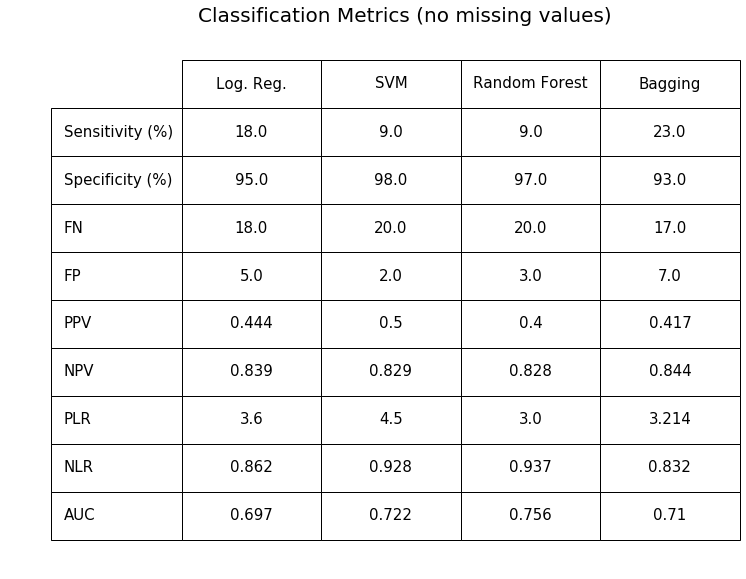

In [33]:
plt.figure(figsize=(10, 10))
plt.title('Classification Metrics (no missing values)', x=0.4, loc='center', fontsize=20)
plt.axis('off')
table = plt.table(methods_metrics, rowLabels=['Sensitivity (%)', 'Specificity (%)', 'FN', 'FP', 'PPV', 'NPV', 'PLR', 'NLR', 
          'AUC'], colLabels=['Log. Reg.', 'SVM', 'Random Forest', 'Bagging'], loc='center', cellLoc='center')
table.set_fontsize(20)
table.scale(1, 4)
plt.show()

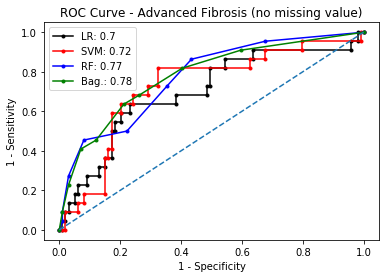

In [34]:
plot_roc_curve(X_train, y_train, X_test, y_test, 'ROC Curve - Advanced Fibrosis (no missing value)')

### Classification Models performance on Advanced Fibrosis with 25% missing values

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_baseline_2, adv_fib_y, random_state=0, test_size=0.2, stratify=adv_fib_y)

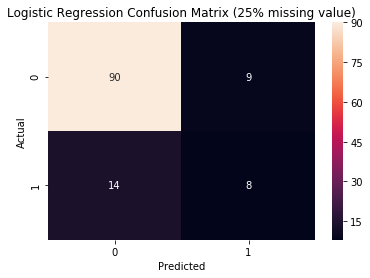

In [36]:
plot_confusion_matrix(LogisticRegression(), X_train, y_train, X_test, y_test, 'Logistic Regression Confusion Matrix (25% missing value)')

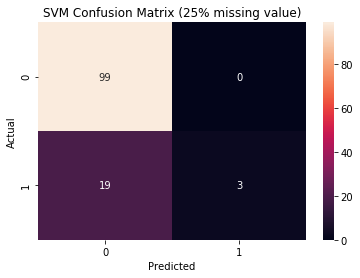

In [37]:
plot_confusion_matrix(SVC(), X_train, y_train, X_test, y_test, 'SVM Confusion Matrix (25% missing value)')

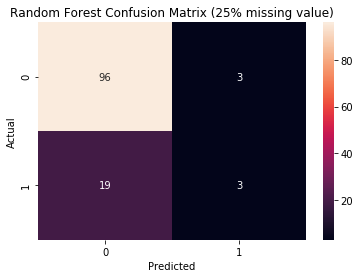

In [38]:
plot_confusion_matrix(RandomForestClassifier(), X_train, y_train, X_test, y_test, 'Random Forest Confusion Matrix (25% missing value)')

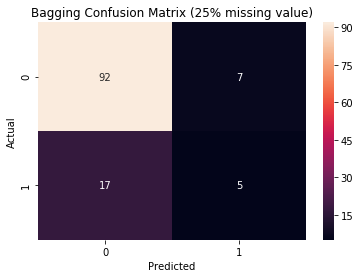

In [39]:
plot_confusion_matrix(BaggingClassifier(), X_train, y_train, X_test, y_test, 'Bagging Confusion Matrix (25% missing value)')

In [40]:
log_reg_metrics = get_metrics(LogisticRegression(), X_train, y_train, X_test, y_test)
svm_metrics = get_metrics(SVC(probability=True), X_train, y_train, X_test, y_test)
rf_metrics = get_metrics(RandomForestClassifier(), X_train, y_train, X_test, y_test)
bagging_metrics = get_metrics(BaggingClassifier(), X_train, y_train, X_test, y_test)
methods_metrics = np.array([log_reg_metrics, svm_metrics, rf_metrics, bagging_metrics]).transpose()

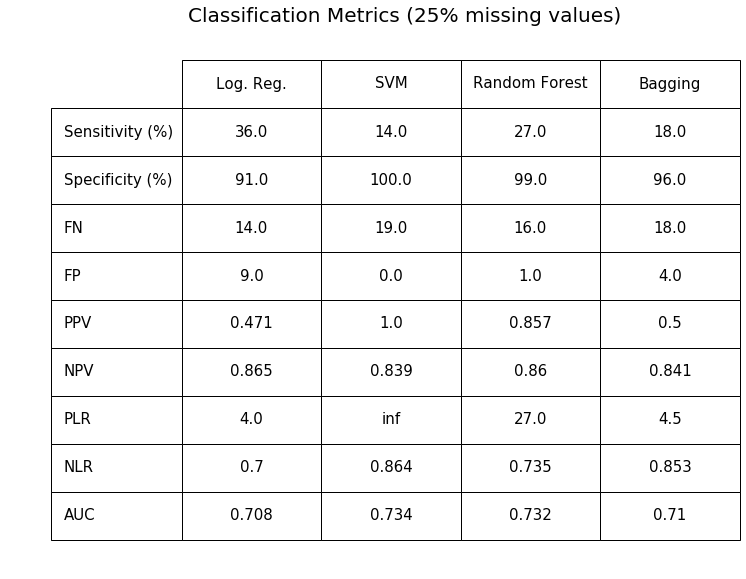

In [43]:
plt.figure(figsize=(10, 10))
plt.title('Classification Metrics (25% missing values)', x=0.4, loc='center', fontsize=20)
plt.axis('off')
table = plt.table(methods_metrics, rowLabels=['Sensitivity (%)', 'Specificity (%)', 'FN', 'FP', 'PPV', 'NPV', 'PLR', 'NLR', 
          'AUC'], colLabels=['Log. Reg.', 'SVM', 'Random Forest', 'Bagging'], loc='center', cellLoc='center')
table.set_fontsize(20)
table.scale(1, 4)
plt.show()

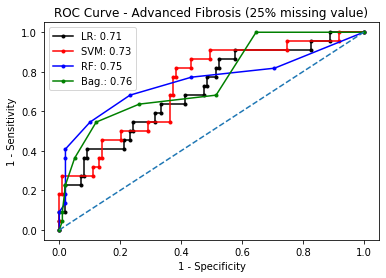

In [42]:
plot_roc_curve(X_train, y_train, X_test, y_test, 'ROC Curve - Advanced Fibrosis (25% missing value)')